# AMATH 352B

## Homework Assignment #3 - due 4/22/2022

This Jupyter Notebook consists of several cells.  Some of the cells are **Markdown** cells, and some of the cells are **Code** cells.

Once you have honed your Notebook to the point where you're ready to turn it in, convert the Notebook to HTML and upload both the Notebook (the .ipynb file) and the HTML version of it to Canvas.  There are potentially issues in the conversion involving figures, graphics, and imported files to solve, so leave yourself enough time to get this done.

In [1]:
from math import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import matplotlib as mpl
import matplotlib.pyplot as plt

Use Gaussian elimination to determine the LU factorization of the following matrices

## Problem #1

$$\begin{pmatrix}1& 2& 4\cr 2& 3& 4\cr -1& 2& 4\cr\end{pmatrix}$$
$$L=\begin{pmatrix}1& 0& 0\cr 2& 1& 0\cr -1& -4& 1\cr\end{pmatrix} \hspace{1cm} U=\begin{pmatrix}1& 2& 4\cr 0& -1& -4\cr 0& 0& 8\cr\end{pmatrix}$$


## Problem #2

$$\begin{pmatrix}4& 2& 1& 0\cr 2& 4& 2& 1\cr 1& 2& 4& 2\cr 0& 1& 2& 4\cr\end{pmatrix}$$
$$L=\begin{pmatrix}1& 0& 0& 0\cr \frac{1}{2}& 1& 0& 0 \cr \frac{1}{4}& \frac{1}{2}& 1& 0\cr 0& \frac{1}{3}& \frac{1}{2}& 1\cr\end{pmatrix} \hspace{1cm}U=\begin{pmatrix}4& 2& 1& 0\cr 0& 3& \frac{3}{2}& 1 \cr 0& 0& 3& \frac{3}{2}\cr 0& 0& 0& \frac{35}{12}\cr\end{pmatrix}$$

## Problem #3

* What is the determinant of the following matrix?

$$\begin{pmatrix}4& 2& 1& 0\cr 0& 3& 2& 1\cr 0& 0& 2& 2\cr 0& 0& 0& 1\cr\end{pmatrix}$$
$$\det=24$$

Using the $LU$ factorization you produced for Problem #2, solving the following linear systems

## Problem #4

$$\begin{pmatrix}4& 2& 1& 0\cr 2& 4& 2& 1\cr 1& 2& 4& 2\cr 0& 1& 2& 4\cr\end{pmatrix}
\begin{pmatrix}x_1\cr x_2\cr x_3\cr x_4\cr\end{pmatrix}=
\begin{pmatrix}7\cr 9\cr 9\cr 7\cr\end{pmatrix}$$

$$\begin{pmatrix}x_1\cr x_2\cr x_3\cr x_4\cr\end{pmatrix}= \begin{pmatrix}1\cr 1\cr 1\cr 1\cr\end{pmatrix}$$

## Problem #5

$$\begin{pmatrix}4& 2& 1& 0\cr 2& 4& 2& 1\cr 1& 2& 4& 2\cr 0& 1& 2& 4\cr\end{pmatrix}
\begin{pmatrix}x_1\cr x_2\cr x_3\cr x_4\cr\end{pmatrix}=
\begin{pmatrix}3\cr -1\cr 1\cr -3\cr\end{pmatrix}$$

$$\begin{pmatrix}x_1\cr x_2\cr x_3\cr x_4\cr\end{pmatrix}= \begin{pmatrix}1\cr -1\cr 1\cr -1\cr\end{pmatrix}$$

## Problem #6

$$\begin{pmatrix}4& 2& 1& 0\cr 2& 4& 2& 1\cr 1& 2& 4& 2\cr 0& 1& 2& 4\cr\end{pmatrix}
\begin{pmatrix}x_1\cr x_2\cr x_3\cr x_4\cr\end{pmatrix}=
\begin{pmatrix}8\cr 20\cr 25\cr 23\cr\end{pmatrix}$$

$$\begin{pmatrix}x_1\cr x_2\cr x_3\cr x_4\cr\end{pmatrix}= \begin{pmatrix}-\frac{3}{35}\cr \frac{89}{35}\cr \frac{114}{35}\cr \frac{112}{35}\cr\end{pmatrix}$$

## Problem #7

Hannah has recently become deeply involved in ham radio.  She has been experimenting with **amplitude modulation** (AM), and she has discovered that she can model the signals she broadcasts by solving the following ordinary differential equation

$$x''(t)+a(t)x'(t)+(2\pi\omega)^2x(t)=0$$

Your job is to help Hannah by writing the Python software to model the signal she broadcasts.  Using the methodology we discussed in class for modeling damped harmonic oscillators, write Python code for modeling the AM signal that she broadcasts.

Perform the following tasks:

* (1) Write the Python code to solve this problem.
* (2) Solve a sample problem for one second of broadcast time, using $x(0)=1$ and $x(1)=0$ as boundary conditions.
* (3) Use the function $a(t):= 20t^3 - 10$ as the amplitude modulator.
* (4) Assume Hannah broadcasts at $\omega = 32$ Hertz
* (5) Use matplotlib to plot that signal.

Here are some interesting and potentially relevant facts

* There are almost 280,000 ham radio operators in the United States
* **Hertz** is the unit of measure which indicates cycles per second
* The factor of $2\pi$ in the coefficient of $x$ occurs because one cycle of a sine wave occurs every $2\pi$ radians.
* The method outlined in class which we are using to solve this problem is called a **finite difference scheme**
* The matrix constructed is an example of a **tridiagonal** linear system
* Nigel's boat has a maximum speed of 7 knots

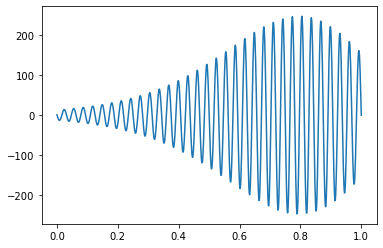

In [14]:
# Amplitude 
n = 1000
h = 1/n
t = np.arange(0, 1, h)
a = 20 * (t ** 3) - 10
b = (2 * np.pi * 32) ** 2

# Initial conditions
x0 = 1
xn = 0

# Create matrix entries 

alpha = 1.0 / h ** 2 - a / (2.0 * h)
beta = b - 2.0 / h ** 2
gamma = 1.0 / h ** 2 + a / (2.0 * h)

# Construct matrix and right hand side vector

amat = np.zeros((n - 2, n - 2))
rhs = np.zeros((n - 2,))
for i in range(0, n - 2):
    if i == 0:
        rhs[i] = -alpha[i] * x0
    else:
        amat[i][i - 1] = alpha[i]
    amat[i][i] = beta
    if i == n - 3:
        rhs[n - 3] = -gamma[i] * xn
    else:
        amat[i][i + 1] = gamma[i]
        
# Compute LU factors of the matrix

lu, piv = lu_factor(amat)

# Solve the linear system

x = [x0] + list(lu_solve((lu, piv), rhs)) + [xn]

# Plot the result

t = np.linspace(0, 1, n)
plt.plot(t, x)